In [1]:
import pandas as pd
from pathlib import Path
from importlib import reload
from autumn.projects.sm_covid2.common_school.output_plots import country_highlight as ch

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
c:\Users\rrag0004\.conda\envs\summer2\lib\site-packages\summer\runner\vectorized_runner.py:363: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_strain_infection_values(


In [2]:
analysis_folder = Path.cwd() / "31747883_full_analysis_26Sep2023_main"

In [3]:
import yaml
from autumn.projects.sm_covid2.common_school.calibration import get_bcm_object
from estival.sampling import tools as esamp

def get_mle_derived_outputs(iso3):    
    best_params_path = analysis_folder / iso3 / "retained_best_params.yml"
    with open(best_params_path, "r") as f:
        best_params = yaml.unsafe_load(f)
    mle_params = best_params[0]
    
    derived_outputs = {}
    for sc in ["baseline", "scenario_1"]:
        bcm = get_bcm_object(iso3, scenario=sc)
        res = esamp.model_results_for_samples([mle_params], bcm)
        derived_outputs[sc] = res.results.xs(0, level="sample", axis=1)

    return derived_outputs

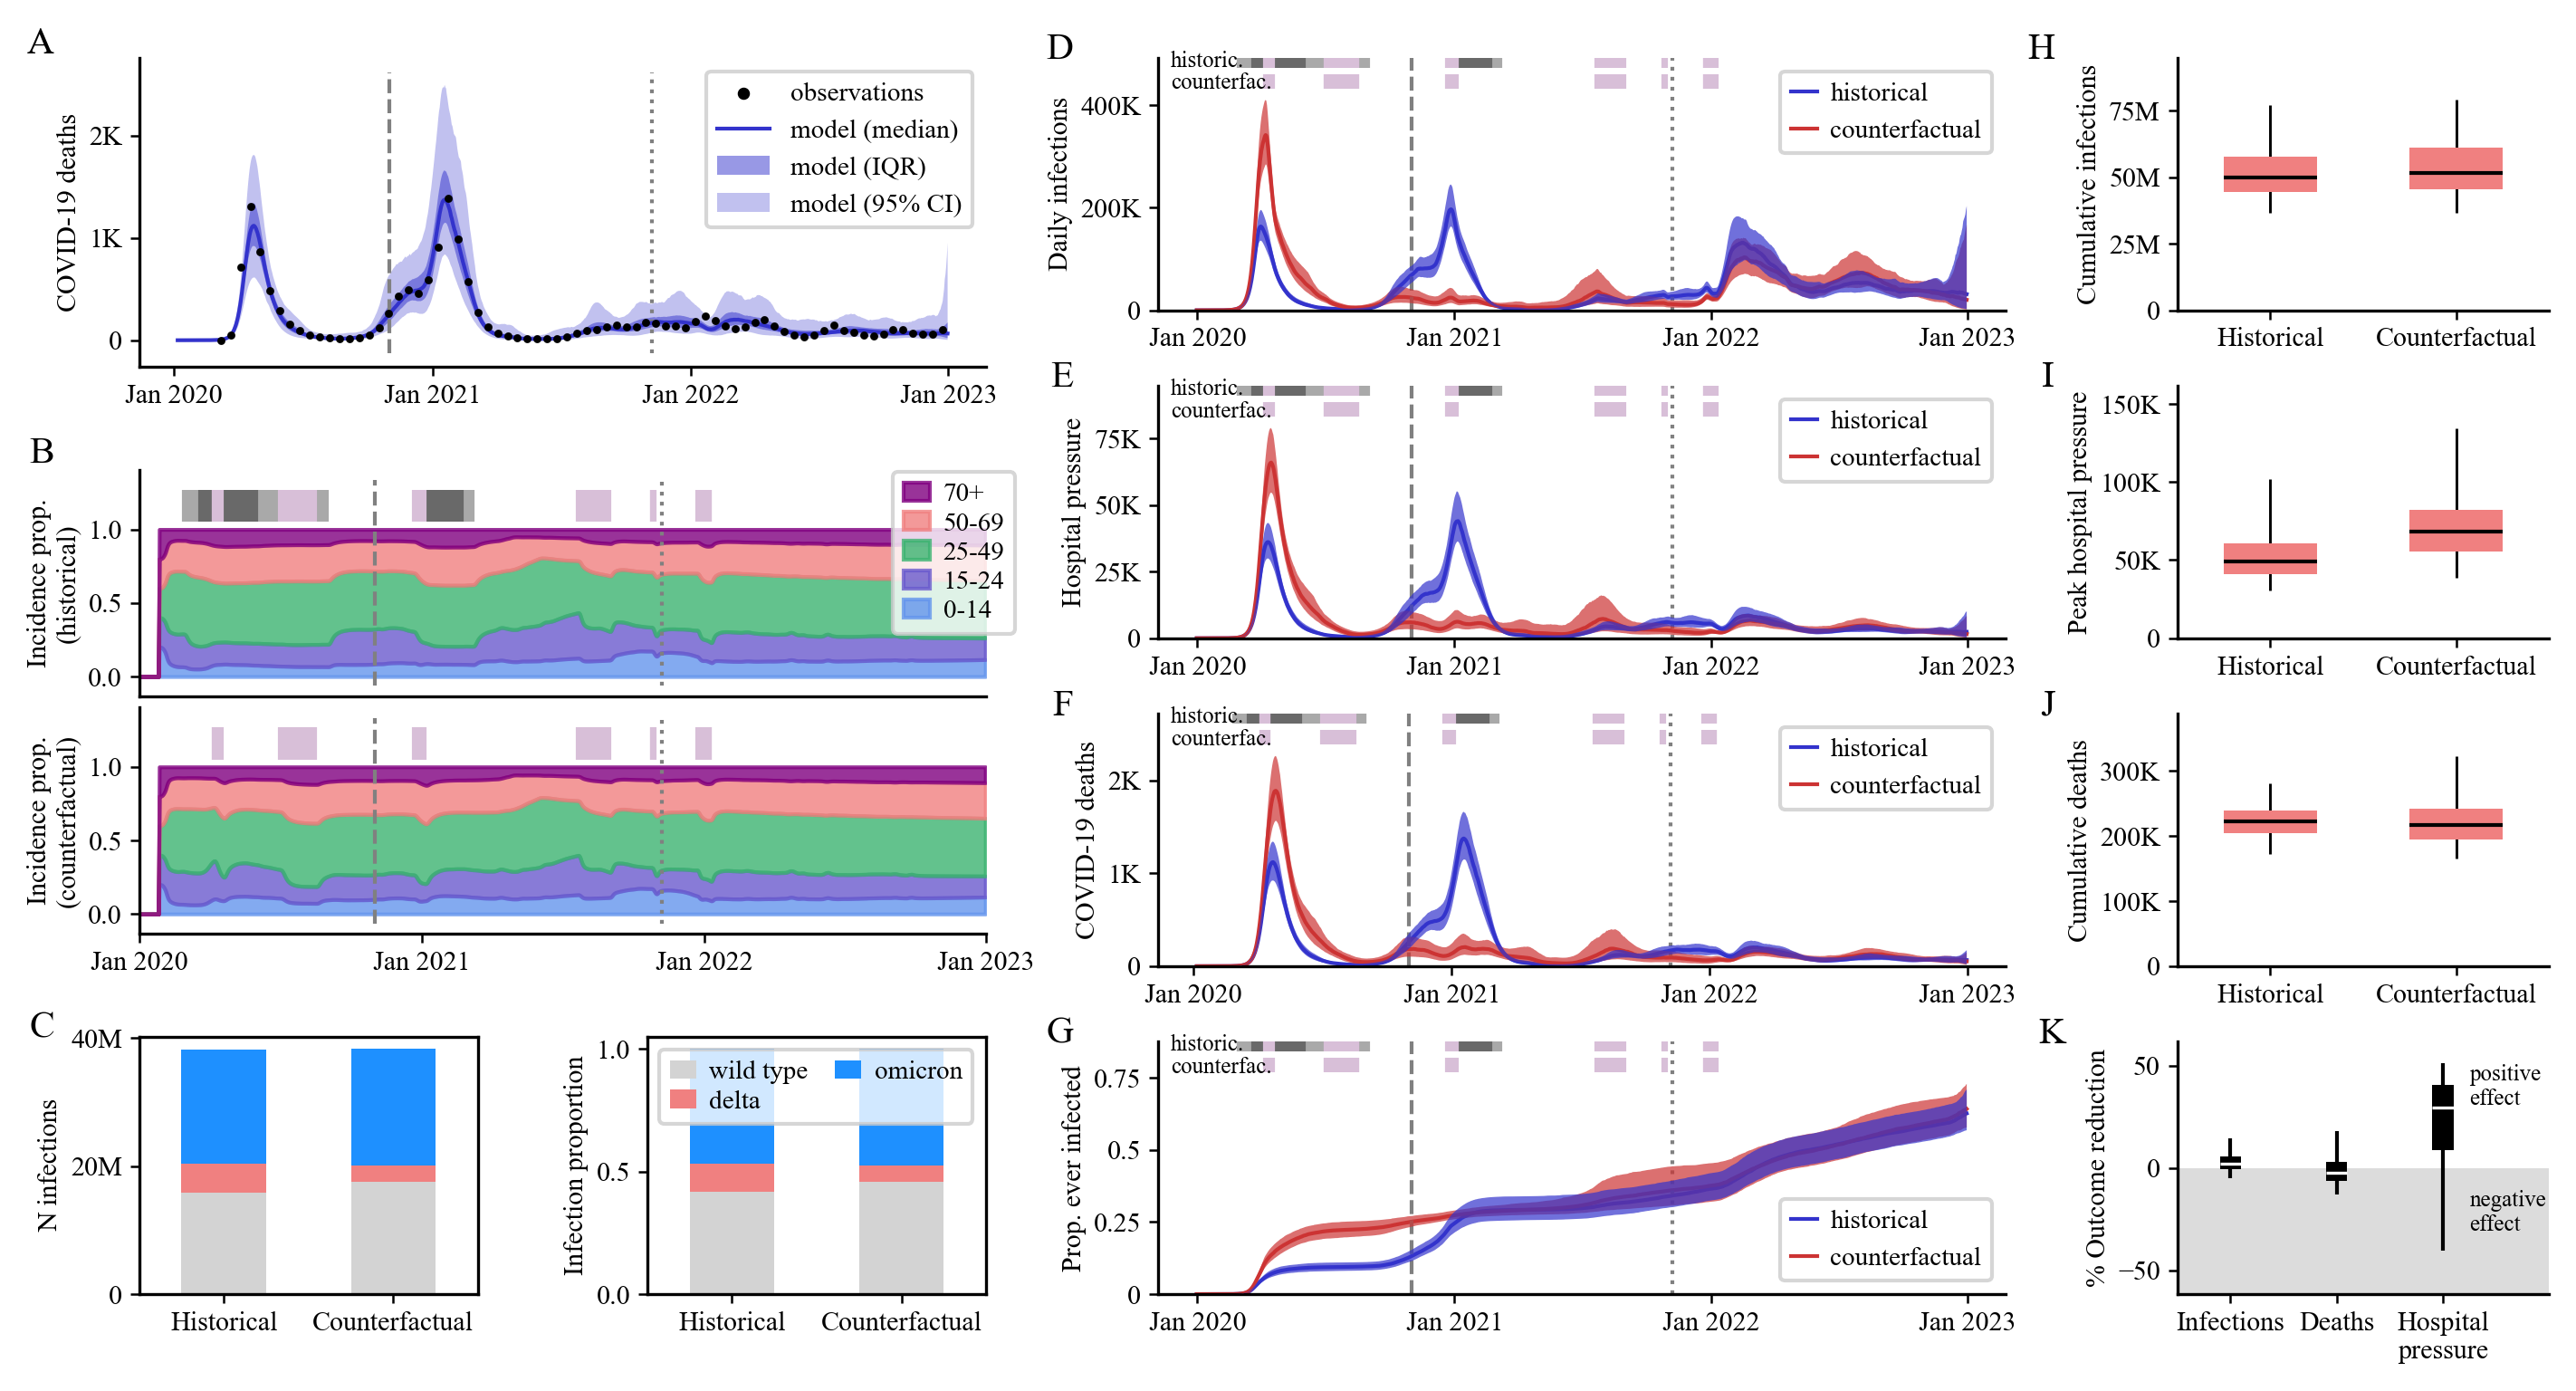

In [6]:
# for iso3 in ["MAR", "IDN"]:
for iso3 in ["GBR"]:

    uncertainty_dfs = {sc: pd.read_parquet(analysis_folder / iso3 / f"uncertainty_df_{sc}.parquet") for sc in ["baseline", "scenario_1"]}
    diff_quantiles_df = pd.read_parquet(analysis_folder / iso3 / f"diff_quantiles_df.parquet")
    derived_outputs = get_mle_derived_outputs(iso3)
    fig = ch.make_country_highlight_figure(iso3, uncertainty_dfs, diff_quantiles_df, derived_outputs)
    for file_format in ["png", "pdf"]:
        fig.savefig(f"highlights_{iso3}.{file_format}", bbox_inches='tight')

In [5]:
# reload(ch)
# fig = ch.make_country_highlight_figure("IDN", uncertainty_dfs, diff_quantiles_df, derived_outputs)